In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [2]:
import pickle
with open('saved_runs/df_scores_221118.pickle', 'rb') as handle:
    df_scores = pickle.load(handle)
with open('saved_runs/MC_run_221118_v2.pickle', 'rb') as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]

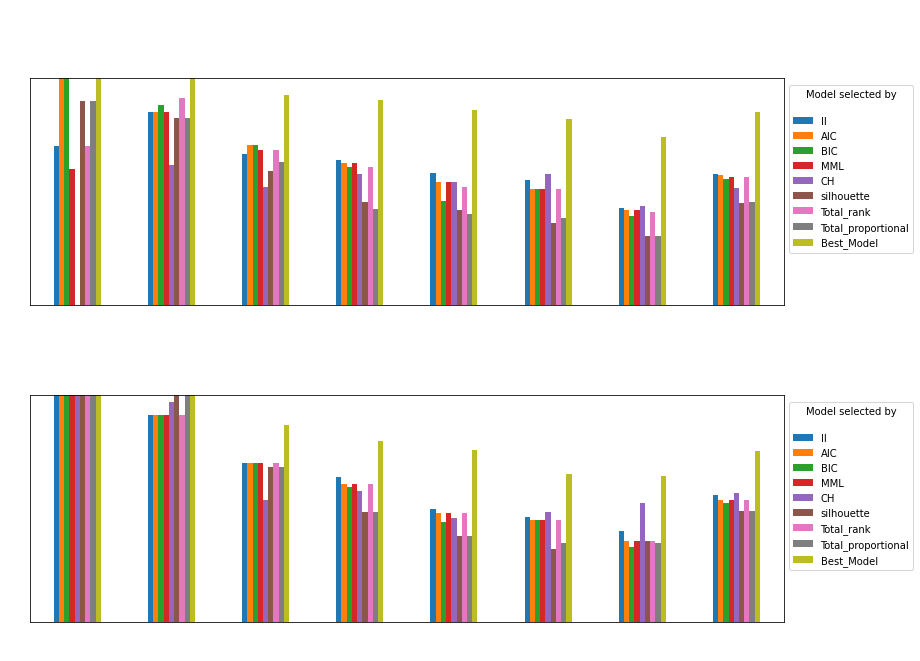

In [3]:
from plotting.mc_simulation.criteria.plot import plot_comparison_criteria
settings = {
    "sup_title_size": 25
}
fig, data = plot_comparison_criteria(df_scores, settings)
fig

In [4]:
data

,True cluster number,correctly_identified_clusters,criteria,init_routine
0,6,0.551282,ll_rank,random_inside
1,3,0.666667,ll_rank,random_inside
2,5,0.580000,ll_rank,random_inside
3,2,0.852941,ll_rank,random_inside
4,4,0.640625,ll_rank,random_inside
...,...,...,...,...
3,2,1.000000,Best_Model_,OPTICS
4,4,0.796875,Best_Model_,OPTICS
5,7,0.642857,Best_Model_,OPTICS
6,1,1.000000,Best_Model_,OPTICS


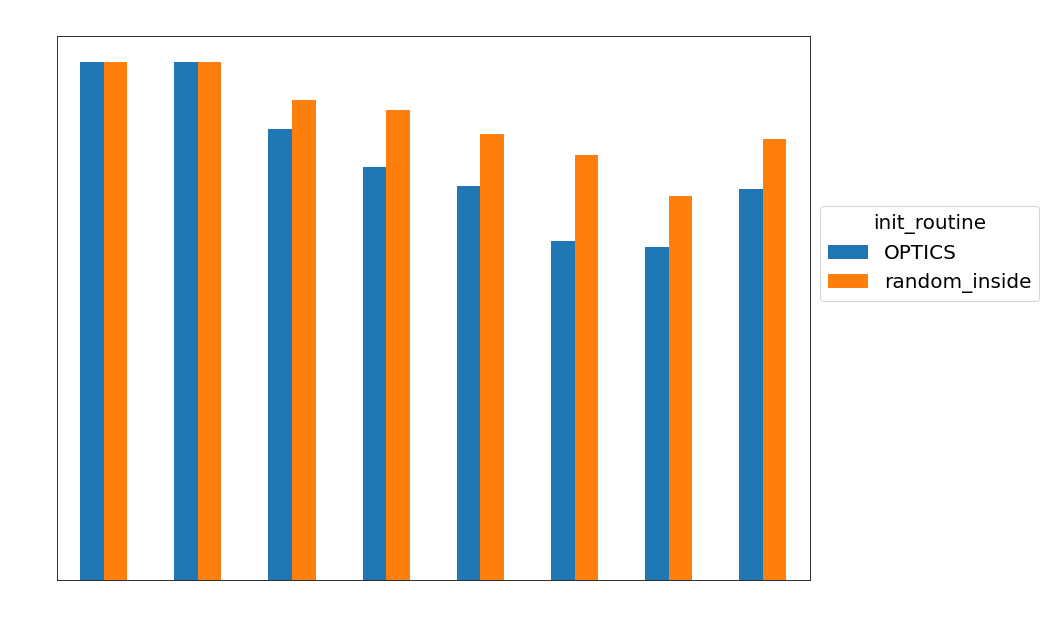

In [5]:
from plotting.mc_simulation.comparison_init_rout_best_model.plot import plot_init_routine_comparison_best_models
plot_init_routine_comparison_best_models(data)

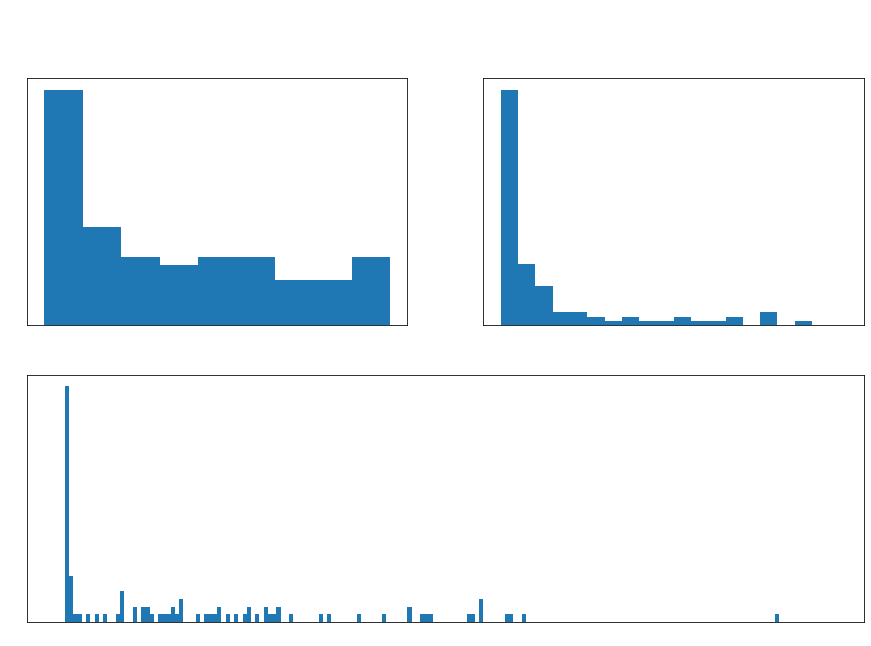

In [6]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank ="Total_rank_rank" #  "AIC_rank" #
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)
    

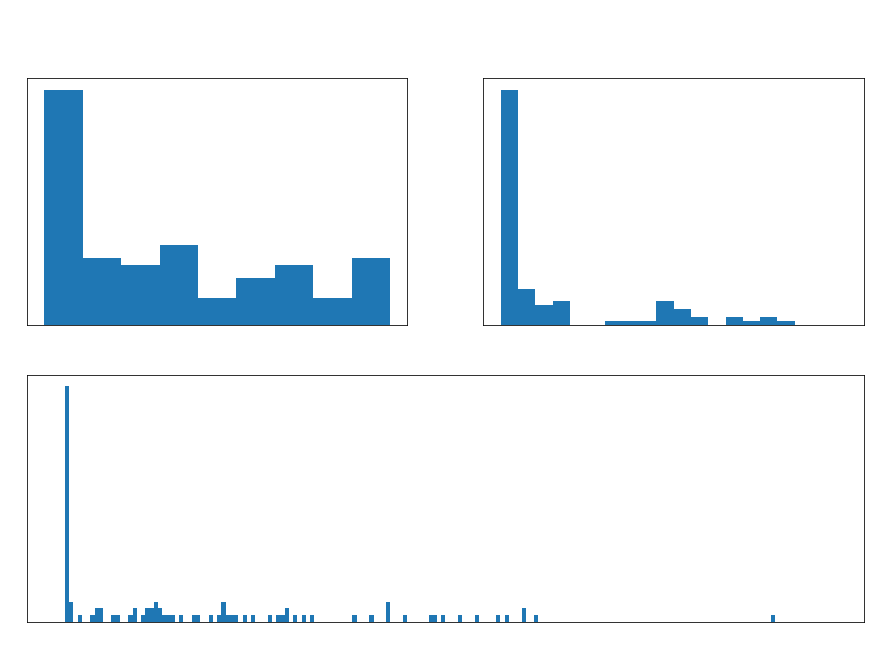

In [7]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank = "AIC_rank" #"Total_rank_rank" # 
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)

In [8]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 33
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.head(50)


best model: 6 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
6028,6028,141,2.791921,2.820657,150,88,9,33,random_inside,5,7,244.871946,-224.871946,-188.138713,-210.259260,0.406927,387.280439,0.928983,1,1,12,1,14,4,43,29,1,5.0
6024,6024,85,4.650675,4.663433,89,84,4,33,random_inside,5,7,244.863777,-224.863777,-188.130545,-210.250978,0.406927,387.280439,0.928983,2,2,13,2,14,4,44,33,2,5.0
6020,6020,116,4.820253,4.914843,146,80,30,33,random_inside,5,7,244.862003,-224.862003,-188.128771,-210.249298,0.406927,387.280439,0.928983,3,3,14,3,14,5,45,37,3,5.0
6030,6030,101,3.428561,3.478590,119,90,18,33,random_inside,5,7,244.737111,-224.737111,-188.003878,-210.122884,0.406927,387.280439,0.928981,4,4,15,4,14,4,46,41,4,5.0
6006,6006,70,3.087900,3.091625,71,66,1,33,random_inside,4,7,237.850399,-221.850399,-192.463813,-207.185012,0.390774,260.835140,0.926607,6,6,1,6,24,56,55,43,5,4.0
6023,6023,52,2.429704,2.501223,70,83,18,33,random_inside,5,7,244.735736,-224.735736,-188.002503,-210.121331,0.406927,387.280439,0.928981,5,5,16,5,14,5,47,45,6,5.0
6019,6019,60,2.691012,2.691012,60,79,0,33,random_inside,4,7,237.831562,-221.831562,-192.444975,-207.166079,0.390774,260.835140,0.926606,7,7,2,7,24,56,56,47,7,4.0
6002,6002,77,3.488606,3.501210,81,62,4,33,random_inside,4,7,237.830594,-221.830594,-192.444008,-207.165153,0.390774,260.835140,0.926606,8,8,3,8,24,57,57,51,8,4.0
6016,6016,71,3.392394,3.392394,71,76,0,33,random_inside,4,7,237.827863,-221.827863,-192.441277,-207.162461,0.390774,260.835140,0.926606,9,9,4,9,24,57,58,55,9,4.0
6015,6015,70,3.356992,3.373865,77,75,7,33,random_inside,4,7,237.827652,-221.827652,-192.441066,-207.162116,0.390774,260.835140,0.926606,10,10,5,10,24,57,59,59,10,4.0


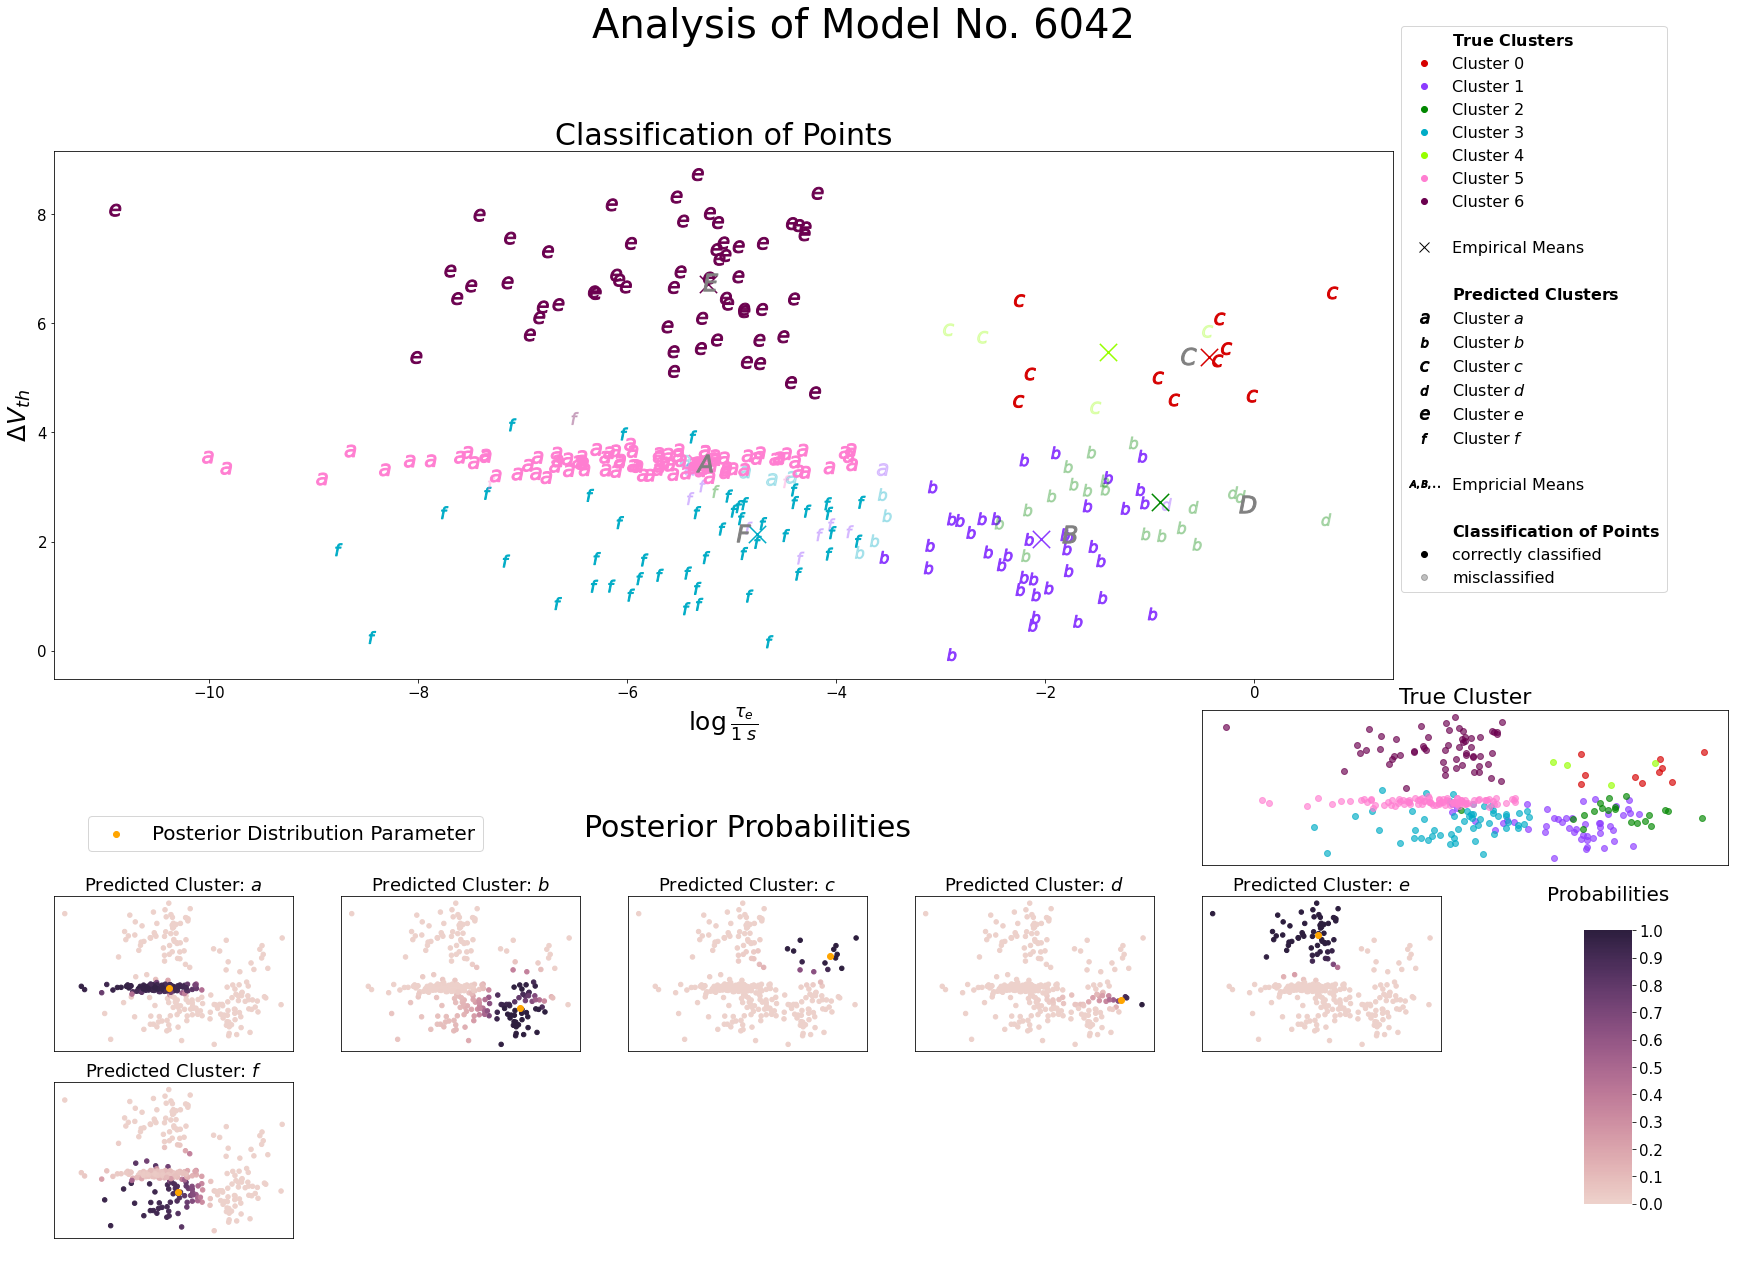

In [9]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
model_idx = 6042
#criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)

In [10]:
model_idx

6042

In [11]:
6%5

1

In [12]:
from plotting.plot_funcs import plot_responsibilities

plot_responsibilities(run_data[dataset], run_results[init_routine]["em_results"][dataset][param_idx]) 

NameError: name 'run_data' is not defined